In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt


In [3]:
# load the dataset
df=pd.read_csv(r"C:\Users\sreel\Downloads\drugEffects.csv").drop(columns=['Unnamed: 0'])
df.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [4]:
#check null values

df.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        1
sideEffects      0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        0
sideEffects      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3106 entries, 0 to 3106
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   urlDrugName    3106 non-null   object
 1   rating         3106 non-null   int64 
 2   effectiveness  3106 non-null   object
 3   condition      3106 non-null   object
 4   sideEffects    3106 non-null   object
dtypes: int64(1), object(4)
memory usage: 145.6+ KB


In [10]:
df.describe()

,rating
count,3106.000000
mean,7.007727
std,2.936681
min,1.000000
25%,5.000000
50%,8.000000
75%,9.000000
max,10.000000


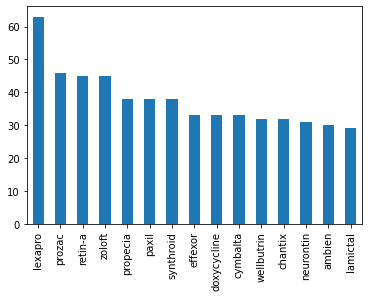

In [11]:
# To check the available drugs

df['urlDrugName'].value_counts().head(15).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,7)
plt.show()


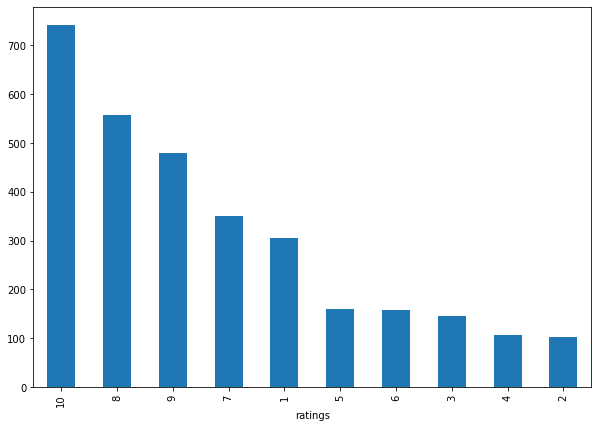

In [12]:
# Rating of drugs

df['rating'].value_counts().plot(kind='bar')
plt.xlabel('ratings')
plt.show()

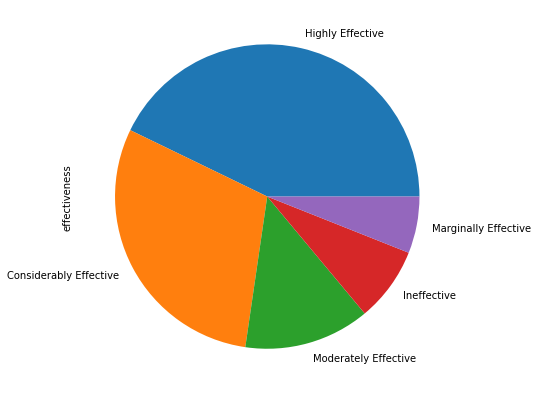

In [13]:
#Effectiveness of the drugs

df['effectiveness'].value_counts().plot(kind='pie')
plt.show()

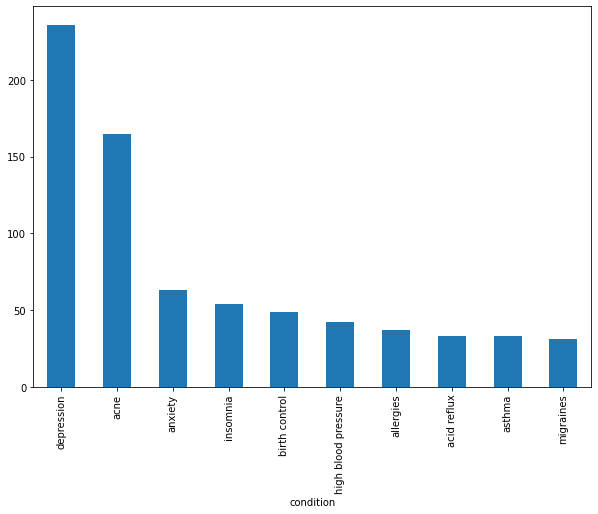

In [14]:
df['condition'].value_counts().head(10).plot(kind='bar')
plt.xlabel('condition')
plt.show()

In [15]:
df['condition'].value_counts()

depression                                          236
acne                                                165
anxiety                                              63
insomnia                                             54
birth control                                        49
                                                   ... 
panic attacks, depression                             1
extrinsic aging                                       1
all over and various type pain                        1
excessive coughing, later diagnosed as pneumonia      1
total hysterctomy                                     1
Name: condition, Length: 1426, dtype: int64

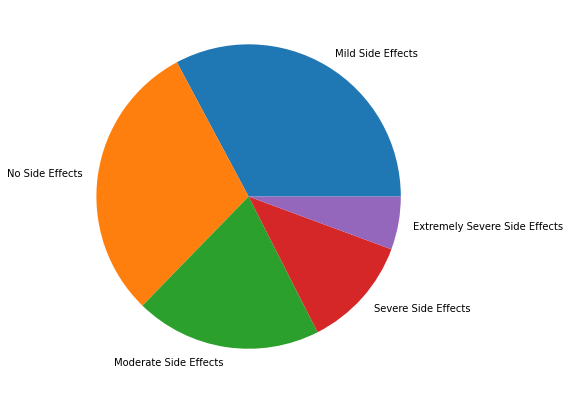

In [16]:
df['sideEffects'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [17]:
#put target into a seperate columns

target=df.pop('sideEffects')
df.head()

,urlDrugName,rating,effectiveness,condition
0,enalapril,4,Highly Effective,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,birth prevention
2,ponstel,10,Highly Effective,menstrual cramps
3,prilosec,3,Marginally Effective,acid reflux
4,lyrica,2,Marginally Effective,fibromyalgia


In [18]:
# to convert the categorical data to numeric

cols=['urlDrugName','effectiveness','condition']

for x in cols:
    df[x]=pd.factorize(df[x])[0]
    
target=pd.factorize(target)[0]
df.head()

,urlDrugName,rating,effectiveness,condition
0,0,4,0,0
1,1,1,0,1
2,2,10,0,2
3,3,3,1,3
4,4,2,1,4


In [19]:
# scaling the data before modelling

scaler=StandardScaler()
df=scaler.fit_transform(df)

df

array([[-1.21280119, -1.02435755, -1.0466628 , -0.94250417],
       [-1.20431494, -2.04608348, -1.0466628 , -0.94016719],
       [-1.1958287 ,  1.01909431, -1.0466628 , -0.93783021],
       ...,
       [ 0.35715464, -1.70550817, -0.41208645,  2.38769227],
       [ 3.03880891,  0.33794369,  0.85706626, -0.67141449],
       [ 1.16334817, -1.02435755,  1.49164261, -0.74152389]])

In [20]:
#splitting data into train and validation

x_train, x_test, y_train, y_test = train_test_split(df,target)


In [21]:
#Using SVM

svm_clf=SVC().fit(x_train,y_train)

svm_pred=svm_clf.predict(x_test)

print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53       282
           1       0.35      0.46      0.40        81
           2       0.51      0.58      0.54       226
           3       0.46      0.28      0.34        40
           4       0.45      0.31      0.37       148

    accuracy                           0.48       777
   macro avg       0.46      0.43      0.44       777
weighted avg       0.48      0.48      0.48       777



In [22]:
#Using Random Forest

rf_clf=RandomForestClassifier().fit(x_train,y_train)

rf_pred=rf_clf.predict(x_test)

print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.47      0.46      0.47       282
           1       0.26      0.27      0.27        81
           2       0.49      0.51      0.50       226
           3       0.37      0.38      0.37        40
           4       0.37      0.35      0.36       148

    accuracy                           0.43       777
   macro avg       0.39      0.39      0.39       777
weighted avg       0.43      0.43      0.43       777



In [23]:
# Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

nb_clf=GaussianNB().fit(x_train,y_train)

nb_pred=nb_clf.predict(x_test)

print(classification_report(y_test,nb_pred))


              precision    recall  f1-score   support

           0       0.48      0.59      0.52       282
           1       0.34      0.32      0.33        81
           2       0.47      0.45      0.46       226
           3       0.45      0.57      0.51        40
           4       0.47      0.28      0.35       148

    accuracy                           0.46       777
   macro avg       0.44      0.44      0.43       777
weighted avg       0.46      0.46      0.45       777



In [24]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lg_clf=LogisticRegression().fit(x_train,y_train)

lg_pred=lg_clf.predict(x_test)

print(classification_report(y_test,lg_pred))


              precision    recall  f1-score   support

           0       0.49      0.54      0.51       282
           1       0.36      0.49      0.41        81
           2       0.48      0.57      0.52       226
           3       0.36      0.10      0.16        40
           4       0.44      0.24      0.31       148

    accuracy                           0.46       777
   macro avg       0.43      0.39      0.38       777
weighted avg       0.46      0.46      0.45       777



In [25]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier().fit(x_train,y_train)

knn_pred=knn_clf.predict(x_test)

print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.51      0.56      0.54       282
           1       0.27      0.32      0.29        81
           2       0.49      0.50      0.49       226
           3       0.33      0.25      0.29        40
           4       0.36      0.26      0.30       148

    accuracy                           0.45       777
   macro avg       0.39      0.38      0.38       777
weighted avg       0.44      0.45      0.44       777



In [26]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier().fit(x_train,y_train)

dt_pred=dt_clf.predict(x_test)

print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.49      0.44      0.46       282
           1       0.27      0.31      0.29        81
           2       0.45      0.49      0.47       226
           3       0.33      0.28      0.30        40
           4       0.33      0.34      0.34       148

    accuracy                           0.41       777
   macro avg       0.37      0.37      0.37       777
weighted avg       0.42      0.41      0.41       777

